In [28]:
# - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Utils
import numpy as np
from tqdm import tqdm

# Torch Imports
import torch
from torch.nn import MSELoss
from torch.optim import Adam

# Rockpool Imports
from rockpool.nn.modules import LIFTorch, LinearTorch
from rockpool.nn.modules.torch.lif_torch import StepPWL
from rockpool.nn.combinators import Sequential
from rockpool.parameters import Constant
from rockpool.timeseries import TSContinuous, TSEvent

# - Plotting and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

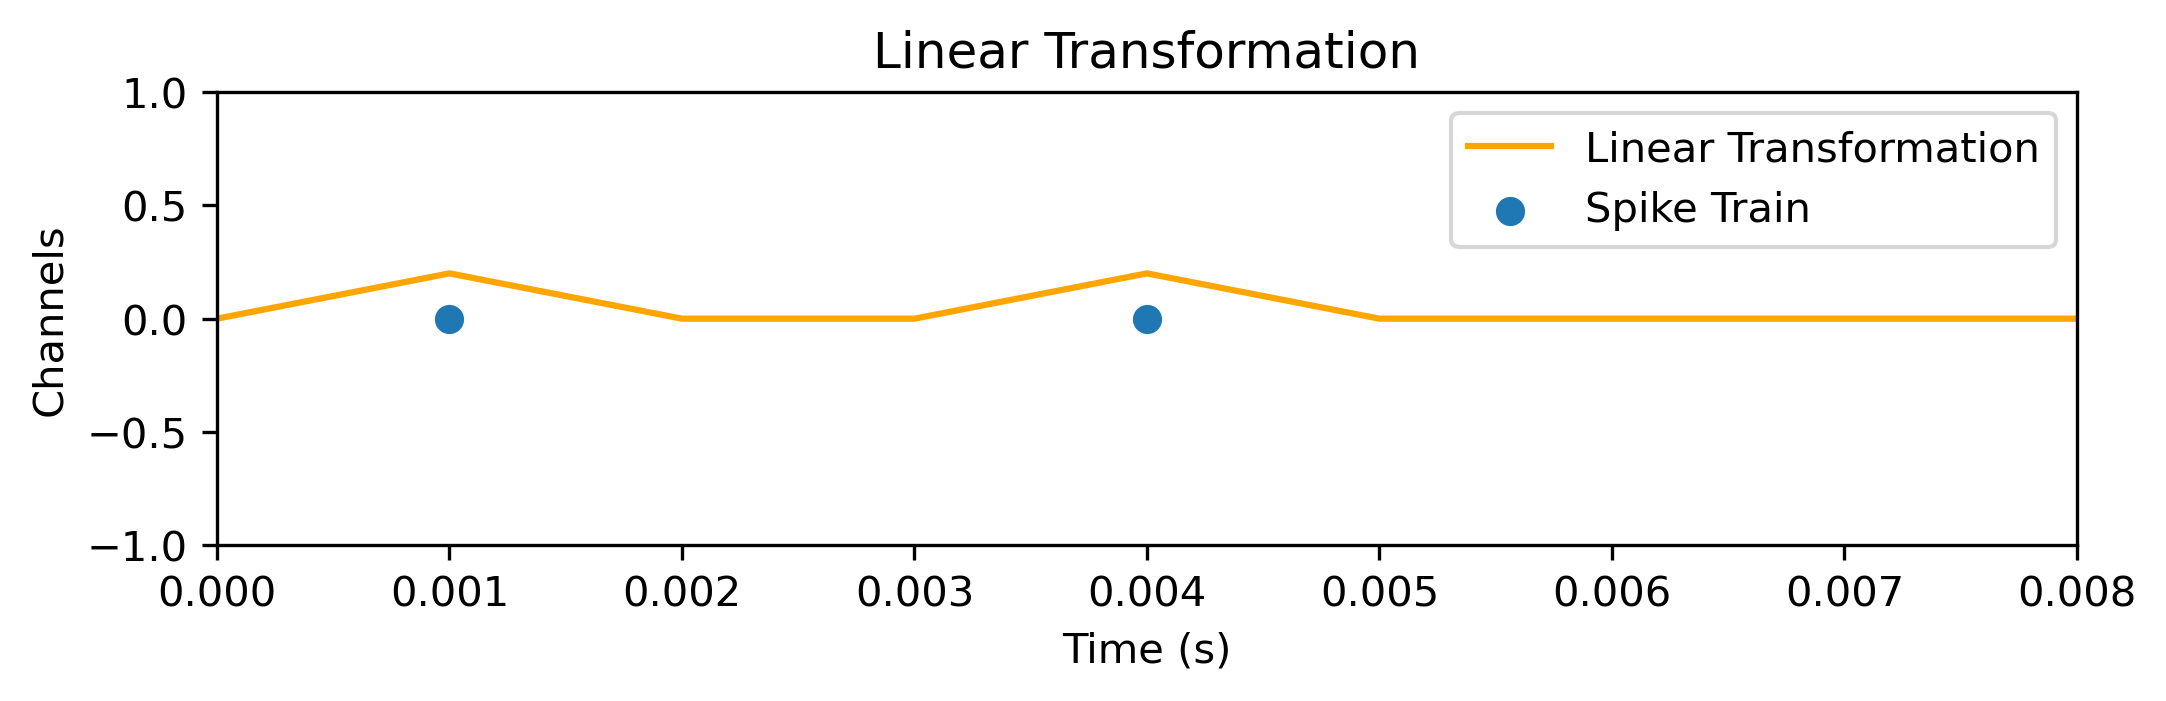

In [51]:
plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams['figure.dpi'] = 300

dt= 1e-3

lin = LinearTorch(shape=(1,1), weight=torch.tensor([[.2]]), has_bias=False)
spike_train = torch.tensor([[[0, 1, 0, 0, 1, 0, 0, 0, 0 ]]], dtype=torch.float).transpose(1,2)
out, _, _ = lin(spike_train)

linear_trans = TSContinuous.from_clocked(out.detach().numpy().flatten(), dt=dt, name="Linear Transformation")
spikes_ts = TSEvent.from_raster(spike_train.detach().numpy().flatten(), dt=dt, name="Spike Train", spikes_at_bin_start=True, t_stop=0.008)
linear_trans.plot(color="orange")
spikes_ts.plot()
plt.legend();

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 2]
# plt.rcParams['figure.dpi'] = 300

# dt= 1e-3

lif = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.01),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

one_spike_train = torch.zeros((1, 1000, 1))
one_spike_train[0, 10, 0] = 1

out, _, _ = lin(spike_train)

linear_trans = TSContinuous.from_clocked(out.detach().numpy().flatten(), dt=dt, name="Linear Transformation")
spikes_ts = TSEvent.from_raster(spike_train.detach().numpy().flatten(), dt=dt, name="Spike Train", spikes_at_bin_start=True, t_stop=0.008)
linear_trans.plot(color="orange")
spikes_ts.plot()
plt.legend();